## They never saw it coming

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import integrate,interpolate
from matplotlib.animation import PillowWriter, FuncAnimation
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from mpl_toolkits.mplot3d import Axes3D

### ¿Cómo calcular las trayectorias de un depredador dado el movimiento del objetivo?

Supongamos el escenario de un depredador y su objetivo o presa. Sea $z(t)$ la función de posición del objetivo respecto al tiempo y $r(t)$ la función de posición del agresor respecto al tiempo. Consideremos ahora un punto fijo $r_0$. 

1. Si $|\dot{r}| = c$ con $c$ una constante, entonces la trayectoria del agresor está completamente determinada por el movimiento del objetivo. Para este caso tenemos $5$ casos adicionales.

(I) $|\dot{z}| = |\dot{r}| = 1$

(II) $|\dot{z}| = v > c$

(III) $|\dot{z}| = v < c$

(IV) Trayectorias no lineales a velocidad constante:

    (a) Curva suave
    (b) Atractor caótico de Rössler. 

Aproximar la derivada numéricamente

$$
u(t+dt) \approx u(t)+dt \cdot u'(t)
$$

### Caso I: $|\dot{z}| = |\dot{r}| = 1$

27.0
[0.         0.01961161 0.03999169 0.06118494 0.08323945 0.10620699
 0.13014336 0.15510878 0.18116825 0.20839202 0.23685608 0.26664267
 0.29784089 0.33054729 0.36486654 0.40091217 0.43880728 0.47868533
 0.5206909  0.56498041 0.61172279 0.66109994 0.71330692 0.76855172
 0.82705421 0.88904406 0.95475695 1.02442812]


C:\Users\maria\AppData\Local\Temp\ipykernel_20636\561184070.py:38: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])


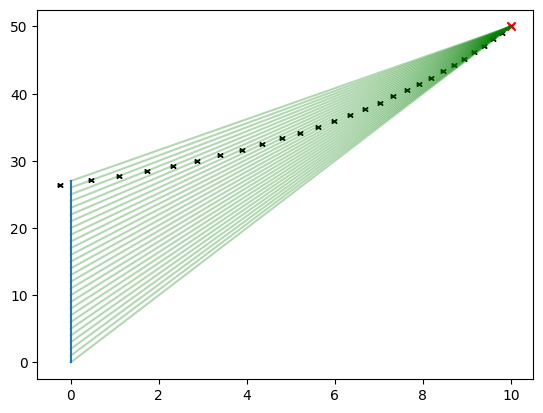

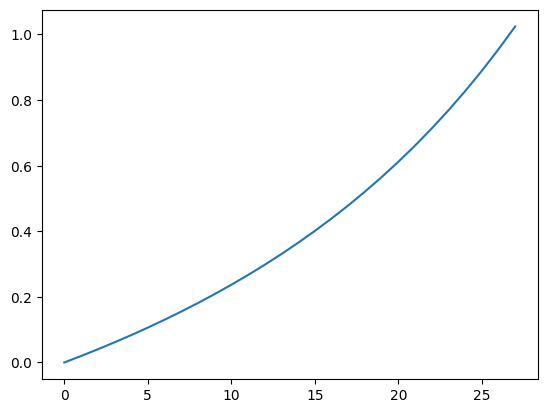

In [2]:
r0 = np.array([10,50])
#c,v = 1.,1.
dt=1.
t=np.arange(0.,100.,dt)
n=len(t)
u=np.zeros(n)
z = np.zeros((n,2))

def ajus(x,a,b):
    return a*x+b

for i in range(n):
    z[i] = [0,t[i]] 

for i in range(n-1):
    if u[i]>=1.:
        print(t[i])
        tau=t[i]
        break
    else:
        u[i+1]=u[i]+dt*(-u[i]*(t[i]-r0[1])+np.sqrt(r0[0]**2+(t[i]-r0[1])**2-(r0[0]*u[i])**2))/(r0[0]**2+(t[i]-r0[1])**2)



tnew = np.arange(0, tau+dt, dt)
n1=len(tnew)
unew = np.zeros_like(tnew)
znew = np.zeros((n1,2))
r=np.zeros((n1,2))
for i in range(n1):
    unew[i]=u[i]
    znew[i]=z[i]
x0=np.linspace(0.,10.,10)
plt.figure(1)
print(unew)
for i in range(n1):
    r[i]=r0+unew[i]*(znew[i]-r0)
    aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]),"green", alpha=0.3)

#print(r)
plt.scatter(r[:,0],r[:,1], color='k',marker=r'$\ltimes$', s=10)
plt.plot(znew[:,0], znew[:,1])
plt.scatter(r0[0],r0[1],marker="x",color="r")
plt.figure(2)
plt.plot(tnew,unew)
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_20636\207938261.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
MovieWriter ffmpeg unavailable; using Pillow instead.


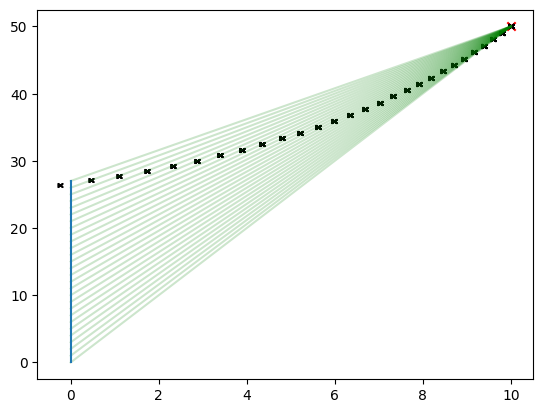

In [3]:
# Crea la figura y los ejes
fig, ax = plt.subplots()
xdata, ydata = [], []


# Función de actualización
for i in range(n1):
    r[i]=r0+unew[i]*(znew[i]-r0)
    aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]), color="green", alpha=0.2)
    
rlist = []

for i in range(n1):
    rlist.append(r[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    ax.scatter(xdata, ydata, color='k' , marker=r'$\ltimes$', s=10)
    


ax.plot(znew[:, 0], znew[:, 1])
ax.scatter(r0[0], r0[1], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=1, frames=n1)

#Guarda la animación
ani.save('anim.gif')

### Otra aproximación:

C:\Users\maria\AppData\Local\Temp\ipykernel_20636\3500798050.py:11: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol1 = integrate.odeint(ED1, Uy0, tiempo)


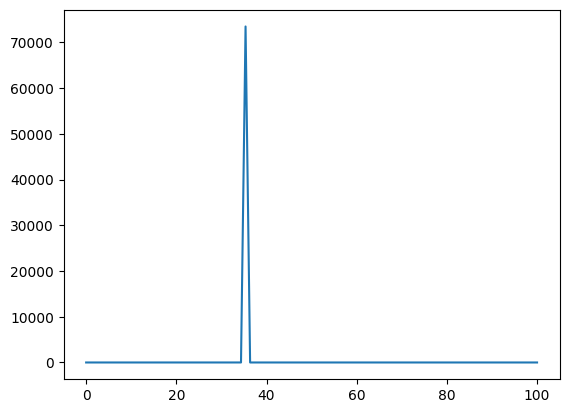

In [4]:
def ED1(U, t):
    return (1+U**2)*((r0[0]/((t-r0[1])**2+r0[0]**2))-(2*(t-r0[1])*U/((t-r0[1])**2+r0[0]**2)))

# Definir condiciones iniciales
Uy0 = 0 # U(-y0) = 0

# Definir el intervalo de tiempo
tiempo = np.linspace(0, 100, 100)  # de 0 a 100 con 100 puntos

# Resolver la ecuación diferencial
sol1 = integrate.odeint(ED1, Uy0, tiempo)

plt.figure()
plt.plot(tiempo, sol1)
plt.show()

26.0


C:\Users\maria\AppData\Local\Temp\ipykernel_20636\3184088603.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u1[i]= (np.sqrt(r0[0]**2 + (t[i]-r0[1])**2)*sol1[i])/(r0[0]*np.sqrt(1+sol1[i]**2))
C:\Users\maria\AppData\Local\Temp\ipykernel_20636\3184088603.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])


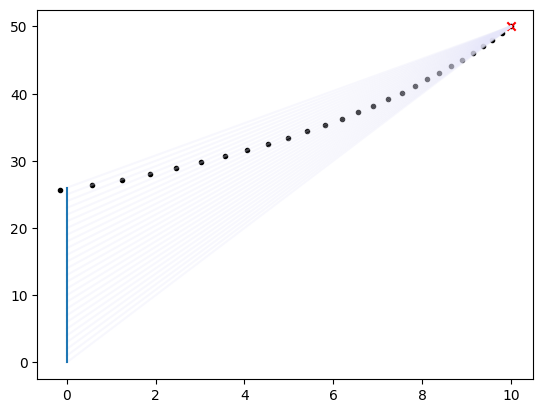

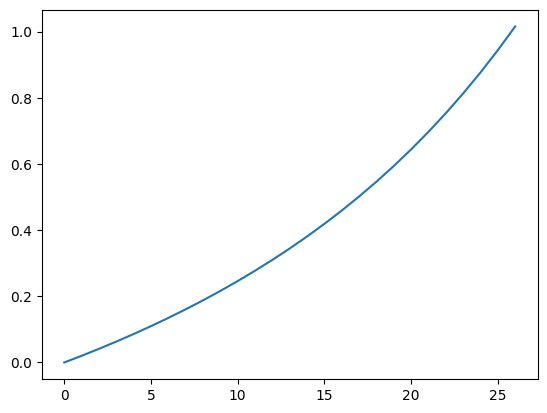

In [5]:
u1=np.zeros(n)

for i in range(n):
    u1[i]= (np.sqrt(r0[0]**2 + (t[i]-r0[1])**2)*sol1[i])/(r0[0]*np.sqrt(1+sol1[i]**2))
    if u1[i]>=1.:
        print(t[i])
        tau=t[i]
        break
        

tnew1 = np.arange(0, tau+dt, dt)
m1=len(tnew1)
unew1 = np.zeros_like(tnew1)
znew1 = np.zeros((m1,2))
r1=np.zeros((m1,2))
for i in range(m1):
    unew1[i]=u1[i]
    znew1[i]=z[i]
x0=np.linspace(0.,10.,10)
plt.figure(1)
for i in range(m1):
    r1[i]=r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]),"lavender", alpha=0.3)


plt.scatter(r1[:,0],r1[:,1], color='k',marker=".")
plt.plot(znew1[:,0], znew1[:,1])
plt.scatter(r0[0],r0[1],marker="x",color="r")
plt.figure(2)
plt.plot(tnew1,unew1)
plt.show()
    

C:\Users\maria\AppData\Local\Temp\ipykernel_20636\1307841109.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
MovieWriter ffmpeg unavailable; using Pillow instead.


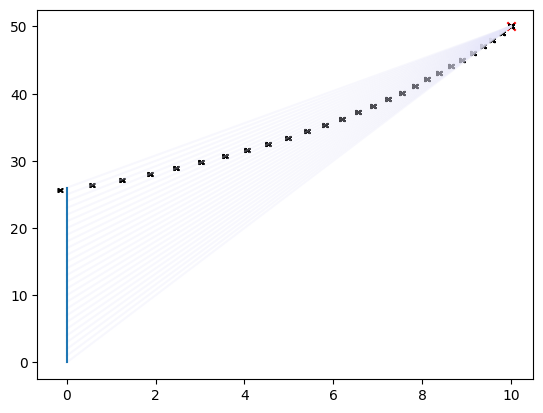

In [6]:
# Crea la figura y los ejes
fig, ax = plt.subplots()
xdata, ydata = [], []


# Función de actualización
for i in range(m1):
    r1[i]=r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z[i,0],r0[0]],[z[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]), color="lavender", alpha=0.3)
    
rlist = []

for i in range(m1):
    rlist.append(r1[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    ax.scatter(xdata, ydata, color='k' , marker=r'$\ltimes$', s=10)
    


ax.plot(znew1[:, 0], znew1[:, 1])
ax.scatter(r0[0], r0[1], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=1, frames=m1)

#Guarda la animación
ani.save('anim01.gif')

### Caso II: $|\dot{z}| = v > c$

3.0
[0.         0.01568929 0.03199336 0.04894796 0.06659156 0.08496559
 0.10411469 0.12408703 0.1449346  0.16671362 0.18948486 0.21331414
 0.23827271 0.26443783 0.29189323 0.32072974 0.35104582 0.38294826
 0.41655272 0.45198433 0.48937823 0.52887995 0.57064554 0.61484138
 0.66164336 0.71123525 0.76380556 0.8195425  0.8786256  0.94121247
 1.00741764]


C:\Users\maria\AppData\Local\Temp\ipykernel_20636\1917971322.py:39: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])


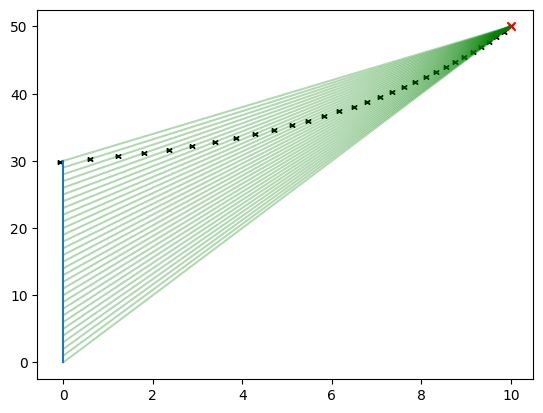

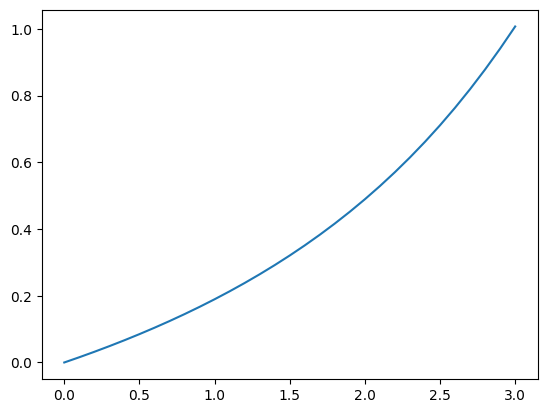

In [7]:
r0 = np.array([10,50])
c = 8.
v = 10.
dt1=0.1
t1=np.arange(0.,10000.,dt1)
m=len(t1)
u1=np.zeros(m)
z1 = np.zeros((m,2))

def ajus(x,a,b):
    return a*x+b

for i in range(m):
    z1[i] = [0,v*t1[i]] 

dz = [0,v]

for i in range(m-1):
    if u1[i]>=1.:
        print(t1[i])
        tau1=t1[i]
        break
    else:
        u1[i+1]=u1[i]+dt1*(-(np.dot(z1[i]-r0,dz))*u1[i]+np.sqrt((np.dot(z1[i]-r0,dz)*u1[i])**2-((v*u1[i])**2-c**2)*(np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2))/((np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2)

tnew1 = np.arange(0, tau1+dt1, dt1)
m1=len(tnew1)
unew1 = np.zeros_like(tnew1)
znew1 = np.zeros((m1,2))
r1 = np.zeros((m1,2))
for i in range(m1):
    unew1[i]=u1[i]
    znew1[i]=z1[i]
x0=np.linspace(0.,10.,10)
plt.figure(1)
print(unew1)
for i in range(m1):
    r1[i] = r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]),"green", alpha=0.3)

#print(r1)
plt.scatter(r1[:,0],r1[:,1], color='k',marker=r'$\ltimes$', s=10)
plt.plot(znew1[:,0], znew1[:,1])
plt.scatter(r0[0],r0[1],marker="x",color="r")
plt.figure(2)
plt.plot(tnew1,unew1)
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_20636\1234563447.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
MovieWriter ffmpeg unavailable; using Pillow instead.


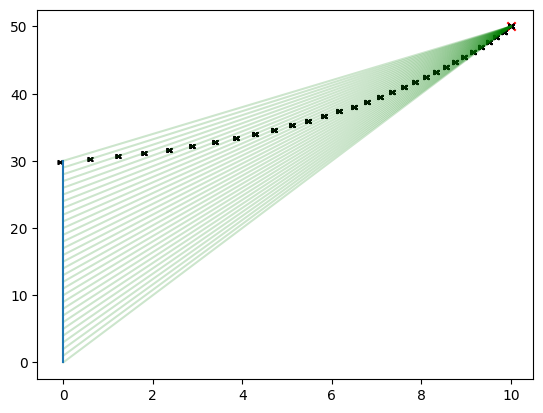

In [8]:
# Crea la figura y los ejes
fig, ax = plt.subplots()
xdata, ydata = [], []


# Función de actualización
for i in range(m1):
    r1[i]=r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]), color="green", alpha=0.2)
    
rlist = []

for i in range(m1):
    rlist.append(r1[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    ax.scatter(xdata, ydata, color='k' , marker=r'$\ltimes$', s=10)
    


ax.plot(znew1[:, 0], znew1[:, 1])
ax.scatter(r0[0], r0[1], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=200, frames=m1)

#Guarda la animación
ani.save('anim1.gif')

### Caso III: $|\dot{z}| = v < c$

4.2
[0.         0.01470871 0.02970291 0.04499077 0.06058074 0.07648158
 0.09270242 0.10925269 0.12614219 0.14338111 0.16098001 0.17894988
 0.19730212 0.21604859 0.23520161 0.25477398 0.27477903 0.29523061
 0.31614314 0.3375316  0.35941162 0.38179942 0.40471192 0.42816672
 0.45218216 0.47677732 0.50197209 0.52778717 0.55424413 0.58136544
 0.60917449 0.63769563 0.66695425 0.69697676 0.72779064 0.7594245
 0.79190808 0.82527232 0.85954933 0.89477247 0.93097634 0.96819678
 1.00647089]


C:\Users\maria\AppData\Local\Temp\ipykernel_20636\2143218412.py:39: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])


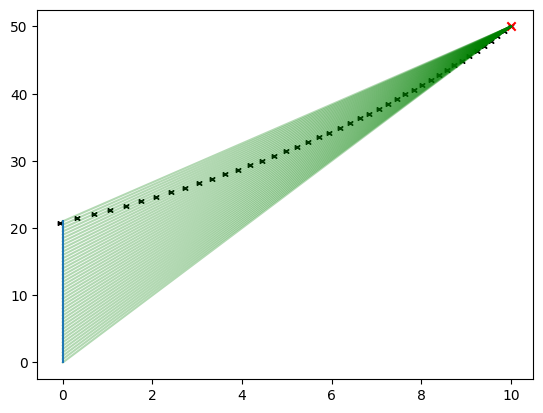

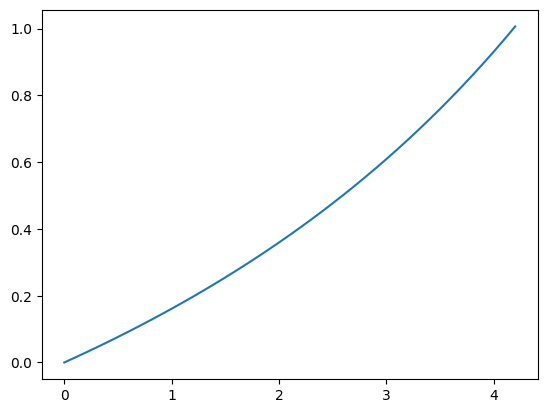

In [9]:
r0 = np.array([10,50])
c = 7.5
v = 5.
dt1=0.1
t1=np.arange(0.,10000.,dt1)
m=len(t1)
u1=np.zeros(m)
z1 = np.zeros((m,2))

def ajus(x,a,b):
    return a*x+b

for i in range(m):
    z1[i] = [0,v*t1[i]] 

dz = [0,v]

for i in range(m-1):
    if u1[i]>=1.:
        print(t1[i])
        tau1=t1[i]
        break
    else:
        u1[i+1]=u1[i]+dt1*(-(np.dot(z1[i]-r0,dz))*u1[i]+np.sqrt((np.dot(z1[i]-r0,dz)*u1[i])**2-((v*u1[i])**2-c**2)*(np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2))/((np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2)

tnew1 = np.arange(0, tau1+dt1, dt1)
m1=len(tnew1)
unew1 = np.zeros_like(tnew1)
znew1 = np.zeros((m1,2))
r1 = np.zeros((m1,2))
for i in range(m1):
    unew1[i]=u1[i]
    znew1[i]=z1[i]
x0=np.linspace(0.,10.,10)
plt.figure(1)
print(unew1)
for i in range(m1):
    r1[i] = r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]),"green", alpha=0.3)

#print(r1)
plt.scatter(r1[:,0],r1[:,1], color='k',marker=r'$\ltimes$', s=10)
plt.plot(znew1[:,0], znew1[:,1])
plt.scatter(r0[0],r0[1],marker="x",color="r")
plt.figure(2)
plt.plot(tnew1,unew1)
plt.show()

C:\Users\maria\AppData\Local\Temp\ipykernel_20636\881281485.py:9: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
MovieWriter ffmpeg unavailable; using Pillow instead.


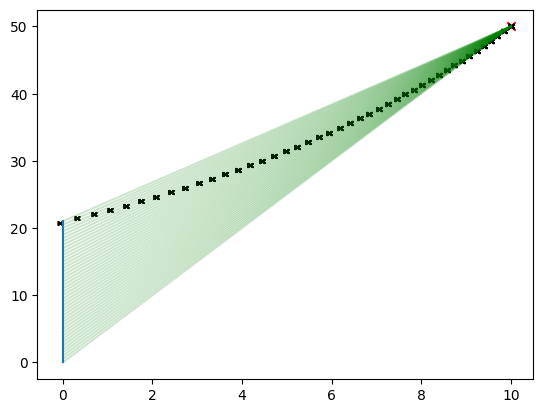

In [10]:
# Crea la figura y los ejes
fig, ax = plt.subplots()
xdata, ydata = [], []


# Función de actualización
for i in range(m1):
    r1[i]=r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    plt.plot(x0,ajus(x0,aj[0],aj[1]), color="green", alpha=0.2)
    
rlist = []

for i in range(m1):
    rlist.append(r1[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    ax.scatter(xdata, ydata, color='k' , marker=r'$\ltimes$', s=10)
    


ax.plot(znew1[:, 0], znew1[:, 1])
ax.scatter(r0[0], r0[1], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=200, frames=m1)

#Guarda la animación
ani.save('anim2.gif')

### Caso IV: Trayectorias no lineales
#### (a) Curva suave

6.0
[0.         0.03319593 0.06866937 0.10665904 0.14739914 0.19110053
 0.23792207 0.28792942 0.34103933 0.39695045 0.45506646 0.51442659
 0.57366968 0.63106902 0.68467737 0.73260446 0.77340091 0.80644128
 0.83210745 0.85158728 0.86636595 0.87777096 0.88679685 0.89413108
 0.90023809 0.90543372 0.90993693 0.9139032  0.91744565 0.92064853
 0.92357595 0.92627769 0.92879316 0.9311541  0.93338653 0.93551214
 0.93754933 0.93951398 0.94142006 0.94328012 0.94510566 0.9469075
 0.94869605 0.95048164 0.95227479 0.95408655 0.95592889 0.95781515
 0.95976068 0.96178369 0.96390639 0.96615674 0.96857097 0.97119752
 0.97410299 0.97738112 0.9811653  0.98564176 0.9910535  0.99767933]


C:\Users\maria\AppData\Local\Temp\ipykernel_20636\966108644.py:41: OptimizeWarning: Covariance of the parameters could not be estimated
  aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])


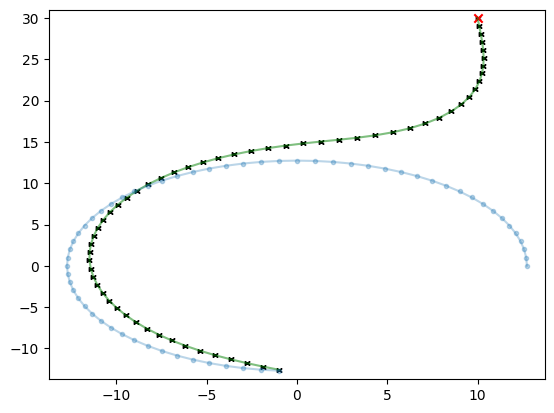

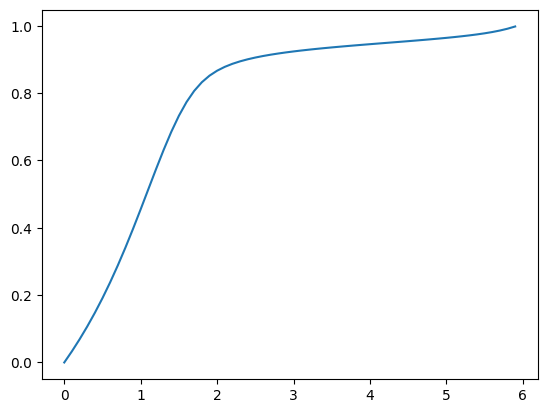

In [11]:
r0 = np.array([10,30])
c = 10.
v = c
dt=0.1
f=np.pi/4
A=v/f
t1=np.arange(0.,10000.,dt)
m=len(t1)
u1=np.zeros(m)
z1 = np.zeros((m,2))
dz= np.zeros_like(z1)

def ajus(x,a,b):
    return a*x+b

for i in range(m):
    z1[i] = [A*np.cos(f*t1[i]),A*np.sin(f*t1[i])] 
    dz[i]=[-A*f*np.sin(f*t1[i]),A*f*np.cos(f*t1[i])]

for i in range(m-1):
    if u1[i]>=1.:
        print(t1[i])
        tau1=t1[i]
        break
    else:
        u1[i+1]=u1[i]+dt1*(-(np.dot(z1[i]-r0,dz[i]))*u1[i]+np.sqrt((np.dot(z1[i]-r0,dz[i])*u1[i])**2-((v*u1[i])**2-c**2)*(np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2))/((np.sqrt((z1[i][0]-r0[0])**2+(z1[i][1]-r0[1])**2))**2)

tnew1 = np.arange(0, tau1, dt1)
m1=len(tnew1)
unew1 = np.zeros_like(tnew1)
znew1 = np.zeros((m1,2))
r1 = np.zeros((m1,2))
for i in range(m1):
    unew1[i]=u1[i]
    znew1[i]=z1[i]
x0=np.linspace(0.,10.,10)
plt.figure(1)
print(unew1)
for i in range(m1):
    r1[i] = r0+unew1[i]*(znew1[i]-r0)
    aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    #plt.plot(x0,ajus(x0,aj[0],aj[1]),"green", alpha=0.3)


#print(r1)
plt.scatter(r1[:,0],r1[:,1], color='k',marker=r'$\ltimes$', s=10)
plt.plot(r1[:,0],r1[:,1], color='green', alpha=0.5)
plt.plot(znew1[:,0], znew1[:,1], marker='.', alpha=0.3)
plt.scatter(r0[0],r0[1],marker="x",color="r")
plt.xlim([-A-1,A+1])
plt.ylim([-A-1,r0[1]+1])
plt.figure(2)
plt.plot(tnew1,unew1)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


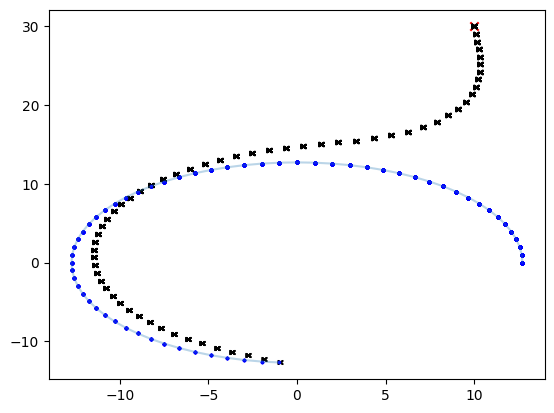

In [12]:
# Crea la figura y los ejes
fig, ax = plt.subplots()
xdata, ydata = [], []
xdata2, ydata2 = [], []

# Función de actualización
for i in range(m1):
    r1[i]=r0+unew1[i]*(znew1[i]-r0)
    #aj,cov=curve_fit(ajus,[z1[i,0],r0[0]],[z1[i,1],r0[1]])
    #plt.plot(x0,ajus(x0,aj[0],aj[1]), color="green", alpha=0.2)
    
rlist = []
zlist=[]

for i in range(m1):
    rlist.append(r1[i].tolist())
    zlist.append(znew1[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    xdata2.append(zlist[i][0])
    ydata2.append(zlist[i][1])
    ax.scatter(xdata, ydata, color='k' , marker=r'$\ltimes$', s=10)
    ax.scatter(xdata2, ydata2, color='b' , marker=r'.', s=10)
    


ax.plot(znew1[:, 0], znew1[:, 1], alpha=0.3)
ax.scatter(r0[0], r0[1], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=200, frames=m1)

#Guarda la animación
ani.save('anim3.gif')

#### (b) Atractor de Rossler

54.5
[0.         0.00197224 0.00395208 0.00593952 0.00793454 0.00993703
 0.01194665 0.01396205 0.01597415 0.01796409 0.01997314 0.02196045
 0.0239744  0.02595371 0.02797757 0.02994626 0.03197962 0.03394103
 0.03597981 0.03793716 0.03997859 0.04193418 0.04397554 0.04593227
 0.04796985 0.04993176 0.05196073 0.05393267 0.05594858 0.05793325
 0.05993653 0.06193003 0.06392704 0.06592265 0.06791812 0.06991321
 0.07190791 0.07390216 0.07589593 0.07788914 0.07988173 0.08187362
 0.08386471 0.0858549  0.0878441  0.08983222 0.09181923 0.09380514
 0.09579009 0.09777432 0.09975824 0.10174237 0.10372733 0.10571368
 0.10770186 0.10969199 0.11168382 0.11367668 0.11566964 0.1176617
 0.11965202 0.12164016 0.12362606 0.12561001 0.12759243 0.1295737
 0.1315541  0.13353376 0.13551278 0.13749119 0.13946903 0.14144633
 0.14342311 0.1453994  0.14737522 0.14935058 0.1513255  0.15329999
 0.15527406 0.15724771 0.15922093 0.16119372 0.16316608 0.16513798
 0.16710942 0.16908037 0.17105082 0.17302073 0.1749901  0.1

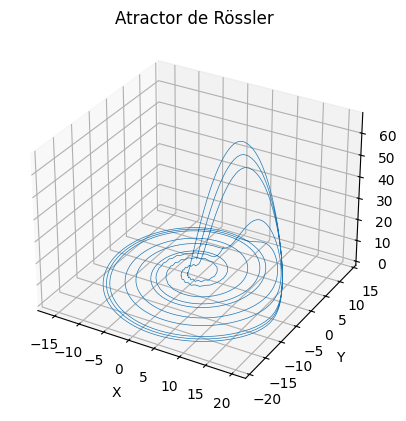

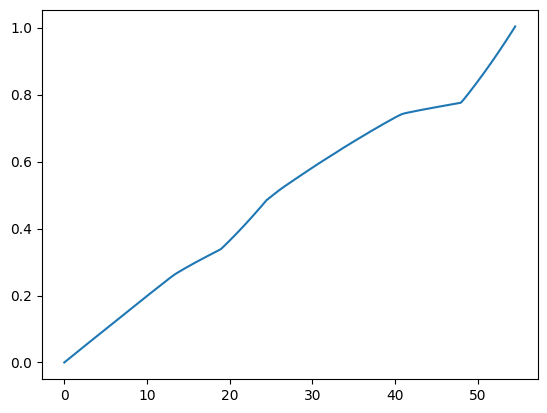

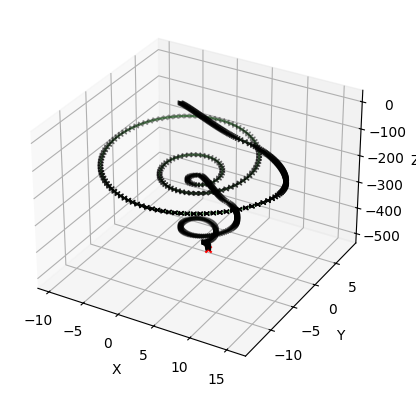

In [13]:
#Punto fijo y velocidades
r0 = np.array([3,-1, -500])
c = 8.
v = 10.

# Parámetros del sistema de Rössler
a = 0.15
b = 0.2
c = 10.

# Definición de la función que representa el sistema de Rössler
def rossler(x, y, z):
    x_dot = -y - z
    y_dot = x + a * y
    z_dot = b + z * (x - c)
    delta = np.sqrt(x_dot**2+y_dot**2+z_dot**2)/v
    return x_dot/delta, y_dot/delta, z_dot/delta

# Paso de integración y tiempo total de simulación
dt = 0.1
t_total = 100.
tau1=t_total
# Condiciones iniciales
x, y, z = 2., 5.0, 7.0

# Listas para almacenar las trayectorias
x_vals, y_vals, z_vals = [x], [y], [z]

# Simulación del sistema de Rössler
for t in np.arange(0, t_total, dt):
    x_dot, y_dot, z_dot = rossler(x, y, z)
    x += x_dot * dt
    y += y_dot * dt
    z += z_dot * dt
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(z)


#Cálculo de u(t)
m=len(x_vals)
t1=np.linspace(0.,t_total,m)
u1=np.zeros(m)
z1 = np.zeros((m,3))

for l in range(m):
    z1[l][0] = x_vals[l]
    z1[l][1] = y_vals[l]
    z1[l][2] = z_vals[l]

dz= np.zeros_like(z1)

for l in range(m):
    dz[l] = rossler(z1[l][0], z1[l][1], z1[l][2])

for i in range(m-1):
    if u1[i]>=1.:
        print(t1[i])
        tau1=t1[i]
        break
    else:
        u1[i+1]=u1[i]+dt*((-(np.dot(z1[i]-r0,dz[i]))*u1[i]+np.sqrt((abs(np.dot(z1[i]-r0,dz[i]))*u1[i])**2-((v*u1[i])**2-c**2)*(abs(np.dot(z1[i]-r0,z1[i]-r0)))))/np.dot(z1[i]-r0,z1[i]-r0))

tnew1 = np.arange(0, tau1+dt, dt)
m1=len(tnew1)
unew1 = np.zeros_like(tnew1)
znew1 = np.zeros((m1,3))
r1 = np.zeros((m1,3))
for i in range(m1):
    unew1[i]=u1[i]
    znew1[i]=z1[i]


print(unew1)
#Cálculo de r
for i in range(m1):
    r1[i] = r0+unew1[i]*(znew1[i]-r0)

# Graficar el atractor de Rössler
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals, y_vals, z_vals, lw=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Atractor de Rössler')

plt.figure(2)
plt.plot(tnew1,unew1)
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(r0[0], r0[1], r0[2], marker="x", color="r")

ax.scatter(r1[:,0],r1[:,1],r1[:,2], color='k',marker=r'$\ltimes$', s=10)
ax.plot(r1[:,0],r1[:,1], r1[:,2], color='green', alpha=0.5)

plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


KeyboardInterrupt: 

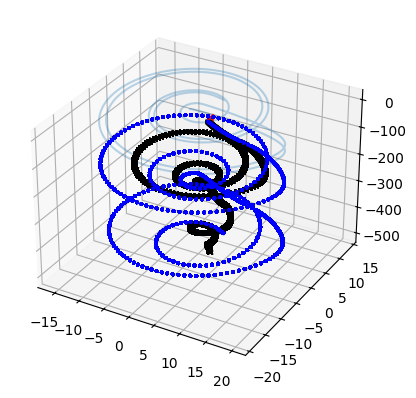

In [14]:
# Crea la figura y los ejes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xdata, ydata,zdata = [], [],[]
xdata2, ydata2,zdata2 = [], [], []

# Función de actualización
    
rlist = []
zlist=[]

for i in range(m1):
    rlist.append(r1[i].tolist())
    zlist.append(znew1[i].tolist())

# Función de animación
def update(i):
    xdata.append(rlist[i][0])
    ydata.append(rlist[i][1])
    zdata.append(rlist[i][2])
    xdata2.append(zlist[i][0])
    ydata2.append(zlist[i][1])
    zdata2.append(rlist[i][2])
    ax.scatter(xdata, ydata,zdata, color='k' , marker=r'$\ltimes$', s=10)
    ax.scatter(xdata2, ydata2,zdata2, color='b' , marker=r'.', s=10)
    


ax.plot(znew1[:, 0], znew1[:, 1], alpha=0.3)
ax.scatter(r0[0], r0[1], r0[2], marker="x", color="r")

# Crea la animación
ani = FuncAnimation(fig, update, interval=0.1, frames=m1)

#Guarda la animación
ani.save('anim4.gif')